In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [119]:
file_path= 'C:/Users/DELL/Desktop/Erdos fresh/'

In [120]:
listings= pd.read_csv(file_path+"listings_mar7_2023.csv",parse_dates=['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 
                                                    'last_review'])

In [121]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            42451 non-null  int64         
 1   listing_url                                   42451 non-null  object        
 2   scrape_id                                     42451 non-null  int64         
 3   last_scraped                                  42451 non-null  datetime64[ns]
 4   source                                        42451 non-null  object        
 5   name                                          42449 non-null  object        
 6   description                                   41701 non-null  object        
 7   neighborhood_overview                         24957 non-null  object        
 8   picture_url                                   42451 non-null  obje

In [122]:
# Property type has a number of values so we will not split by Property type 

listings.property_type.value_counts()                         

Entire rental unit             10390
Entire home                     9388
Private room in home            6953
Entire guesthouse               2330
Private room in rental unit     2153
                               ...  
Shepherd’s hut                     1
Riad                               1
Entire resort                      1
Shared room in dome                1
Private room in dome               1
Name: property_type, Length: 104, dtype: int64

In [123]:
#Room type has a less cardinality so we will split data by room type 

listings.room_type.value_counts()

Entire home/apt    29491
Private room       12180
Shared room          697
Hotel room            83
Name: room_type, dtype: int64

In [124]:
# removing some columns which are either completely blank or not useful to the analysis

listings.drop(columns=['id', 'scrape_id', 'last_scraped', 'source', 'bathrooms', 'calendar_updated'], inplace=True)

In [125]:
# Used Zheyu's code to remove dollar sign and , from prices to turn it from object dtype to float.  

listings['price'] = listings['price'].replace({r'\$':''},regex = True).replace({r',':''},regex = True).astype('float')

In [126]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   42451 non-null  object        
 1   name                                          42449 non-null  object        
 2   description                                   41701 non-null  object        
 3   neighborhood_overview                         24957 non-null  object        
 4   picture_url                                   42451 non-null  object        
 5   host_id                                       42451 non-null  int64         
 6   host_url                                      42451 non-null  object        
 7   host_name                                     42449 non-null  object        
 8   host_since                                    42449 non-null  date

In [127]:
df_null = pd.DataFrame(listings.isna().sum()).reset_index()

In [128]:
df_null.columns = ['Column name', 'Number of missings']

In [130]:
# 22 coulms out of 69 have missing values so we need to work on that 

df_null.to_csv(file_path+'null values in colums.csv')

In [131]:
listings.neighborhood_overview

0                                                      NaN
1                                                      NaN
2        No need to fly away from Los Angeles for a get...
3        Our property is close to downtown San Pedro, t...
4                                                      NaN
                               ...                        
42446    The neighborhood is in a residential area and ...
42447    The house is in a desirable residential family...
42448                                                  NaN
42449    We are 16 Miles to downtown LA, 24 miles to Di...
42450                                                  NaN
Name: neighborhood_overview, Length: 42451, dtype: object

In [132]:
listings[listings.host_name.isna()]

# Webpages of thes two hosts donot exist. 

,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
11232,https://www.airbnb.com/rooms/10034835,Large private bedroom in Palms,Cozy private bedroom in a 2 Bedroom/2Bathroom ...,NaN,https://a0.muscache.com/pictures/03b70113-c47f...,23571738,https://www.airbnb.com/users/show/23571738,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.02
35307,https://www.airbnb.com/rooms/6900415,"Quiet, Cozy West LA House","A beautiful, quiet little house with a great b...",Walking distance to coffee shops and restauran...,https://a0.muscache.com/pictures/87362346/ebd8...,36159573,https://www.airbnb.com/users/show/36159573,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [133]:
listings.license.value_counts()

Exempt - This listing is a transient occupancy residential structure    2419
Exempt - This listing is a bed and breakfast                             470
Exempt                                                                   439
Exempt - This listing is a hotel or motel                                246
HSR19-004485                                                              26
                                                                        ... 
HSR21-003258                                                               1
NRP21-00283                                                                1
HSR21-003343                                                               1
HSR19-005452                                                               1
HSR23-000454                                                               1
Name: license, Length: 6766, dtype: int64

<AxesSubplot: xlabel='room_type', ylabel='price'>

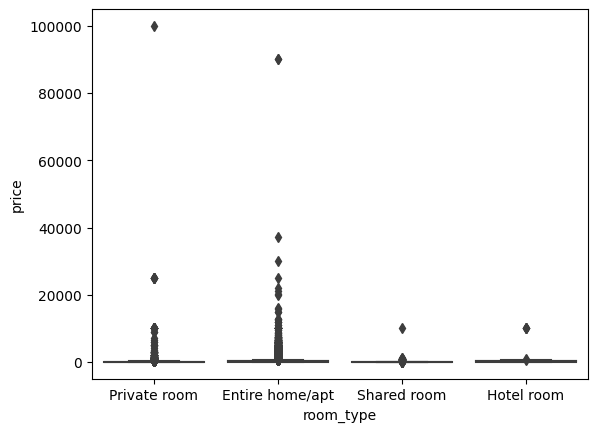

In [134]:
# create grouped boxplot 
sns.boxplot(x = listings.room_type,
            y = listings.price,
            )
# Clearly Entire home apt have higher price than any other room type.

In [139]:
# Creating a license colum to check effect on price 
# Have to also include extemped in 0 category 


listings['license_yn']= pd.Series(np.where(((listings.license.isna()) | (listings.license.str.lower().str.contains('exempt', regex=True))),0,1))

In [141]:
listings.license_yn.value_counts()

0    34085
1     8366
Name: license_yn, dtype: int64

In [142]:
# Creating datasets based on different room types: 

df_private= listings[listings.room_type=='Private room']
df_entire= listings[listings.room_type=='Entire home/apt']
df_shared= listings[listings.room_type=='Shared room']
df_hotel= listings[listings.room_type=='Hotel room']

<AxesSubplot: xlabel='license_yn', ylabel='price'>

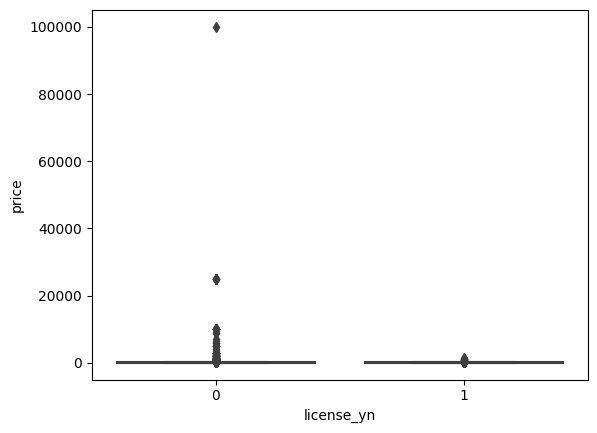

In [137]:
sns.boxplot(x=df_private.license_yn, y=df_private.price)

<AxesSubplot: xlabel='license_yn', ylabel='price'>

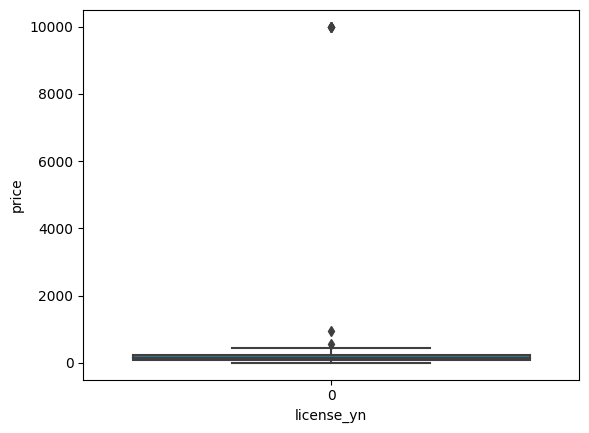

In [144]:
sns.boxplot(x=df_hotel.license_yn, y=df_hotel.price)

<AxesSubplot: xlabel='license_yn', ylabel='price'>

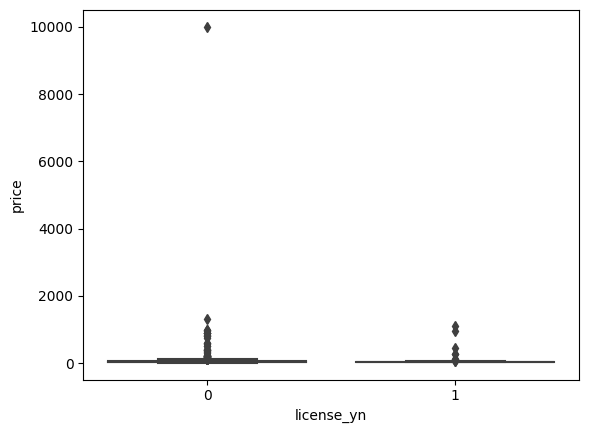

In [145]:
sns.boxplot(x=df_shared.license_yn, y=df_shared.price)

<AxesSubplot: xlabel='license_yn', ylabel='price'>

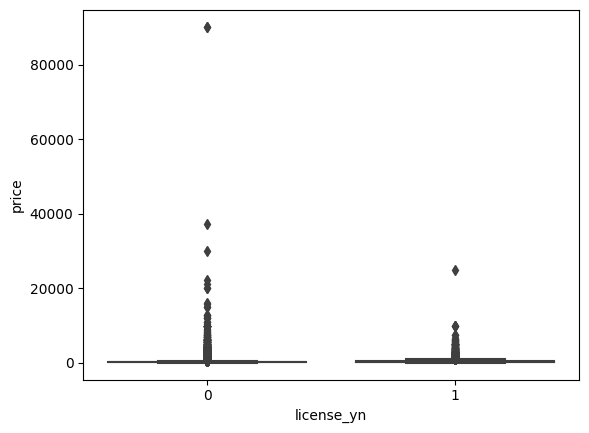

In [147]:
sns.boxplot(x=df_entire.license_yn, y=df_entire.price)

In [148]:
# Correlation between two licenes and prices

listings.license_yn.corr(listings.price)

0.05261421244202871

In [146]:
# Important columns for pricing based on seller perspective: 
